Trabajo Practico Nº 1 Inteligencia Artificial

Alan Cornejo y Martin Paura

In [1]:
from aima_libs.hanoi_states import ProblemHanoi, StatesHanoi
from aima_libs.tree_hanoi import NodeHanoi
from aima_libs.aima import PriorityQueue as AimaPriorityQueue


In [2]:
def heursitic(x: NodeHanoi):    #defino mi función heuristica
    result = 0
    Cant_Disc = len(x.state.rods[0]) +  len(x.state.rods[1]) +  len(x.state.rods[2])
    for i in range(len(x.state.rods[2])):  #Si los discos ya se encuentran en su posiciòn final los trato de dejar ahi
        if x.state.rods[2][i] ==  Cant_Disc - i:
            result -= 1**Cant_Disc
        # else:
        #     i = Cant_Disc  #en cuanto no sea el que corresponde me voy
    aux_rod = 1        
    for j in range(Cant_Disc-1,0,-1):      #Premio a que se coloquen los discos en las varillas alternadamente para poder sacar el disco mas grande y llevarlo a la varilla 2
        for i in range(len(x.state.rods[aux_rod])):
            if x.state.rods[aux_rod][i] ==  j - i:
                result -= 1**j
            # else:
            #     i = Cant_Disc  #en cuanto no sea el que corresponde me voy
        if(aux_rod == 1):
            aux_rod = 0
        else:
            aux_rod = 1
    result += (len(x.state.rods[0]) +  len(x.state.rods[1]))/5.0
    return result

In [3]:
def A_search(number_disks=5):
    # Inicializamos el problema
    list_disks = [i for i in range(number_disks, 0, -1)]
    initial_state = StatesHanoi(list_disks, [], [], max_disks=number_disks,cost=1)
    goal_state = StatesHanoi([], [], list_disks, max_disks=number_disks,cost=1)
    problem = ProblemHanoi(initial=initial_state, goal=goal_state)

    # Creamos una cola FIFO con el nodo inicial
    frontier =  AimaPriorityQueue(order='min', f=heursitic)

    frontier.append(NodeHanoi(problem.initial))
    
    # Creamos el set con estados ya visitados
    explored = set()
    
    node_explored = 0
    
    while len(frontier) != 0:
        struct_node = frontier.pop()
        node_explored += 1
        
        # Agregamos el estado del nodo al set. Esto evita guardar duplicados, porque set nunca tiene elementos repetidos
        explored.add(struct_node[1].state)
        
        if problem.goal_test(struct_node[1].state):  # Comprobamos si hemos alcanzado el estado objetivo
            metrics = {
                "solution_found": True,
                "nodes_explored": node_explored,
                "states_visited": len(explored),
                "nodes_in_frontier": len(frontier),
                "max_depth": struct_node[1].depth,
                "cost_total": struct_node[1].state.accumulated_cost,
            }
            return struct_node[1], metrics
        
        # Agregamos a la cola todos los nodos sucesores del nodo actual
        for next_node in struct_node[1].expand(problem):
            # Solo si el estado del nodo no fue explorado
            if next_node.state not in explored:               
                frontier.append(next_node)  # Corregido

    # Si no se encontro la solución, devolvemos la métricas igual
    metrics = {
        "solution_found": False,
        "nodes_explored": node_explored,
        "states_visited": len(explored),
        "nodes_in_frontier": len(frontier),
        "max_depth": struct_node.depth, # OBS: Si no se encontró la solución, este valor solo tiene sentido en breadth_first_search, en otros casos se debe ir llevando registro de cual fue la máxima profundidad
        "cost_total": None,
    }
    return None, metrics


======1=====
solution_found: True
nodes_explored: 1
states_visited: 1
nodes_in_frontier: 0
max_depth: 0
cost_total: 1
Usage memorie peak: 0.01 [MB]
Execution Time: 0.000171661376953125
======2=====
solution_found: True
nodes_explored: 2
states_visited: 2
nodes_in_frontier: 1
max_depth: 1
cost_total: 2.0
Usage memorie peak: 0.01 [MB]
Execution Time: 0.0003275871276855469
======3=====
solution_found: True
nodes_explored: 4
states_visited: 4
nodes_in_frontier: 3
max_depth: 3
cost_total: 4.0
Usage memorie peak: 0.01 [MB]
Execution Time: 0.0010938644409179688
======4=====
solution_found: True
nodes_explored: 8
states_visited: 8
nodes_in_frontier: 7
max_depth: 7
cost_total: 8.0
Usage memorie peak: 0.02 [MB]
Execution Time: 0.001504659652709961
======5=====
solution_found: True
nodes_explored: 16
states_visited: 16
nodes_in_frontier: 15
max_depth: 15
cost_total: 16.0
Usage memorie peak: 0.04 [MB]
Execution Time: 0.003612041473388672
======6=====
solution_found: True
nodes_explored: 38
states_

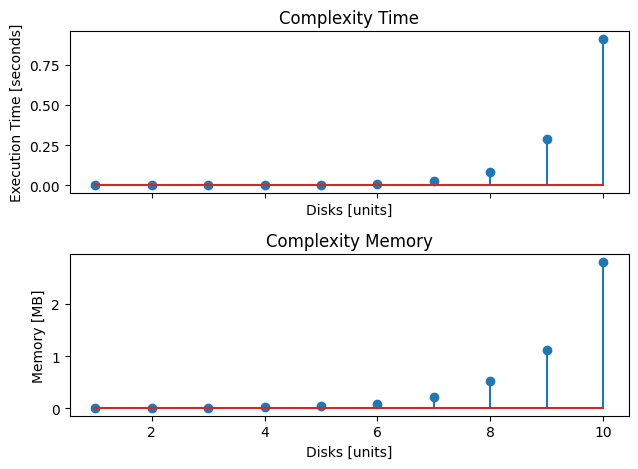

In [4]:
import tracemalloc
import time
import math as m
import matplotlib.pyplot as plt

runs = 3
number_disks_max=10
nodes_explored = []
memory_reg = []
exec_times= []
for i in range(number_disks_max):
    tracemalloc.start()
    inicio = time.time()
    
    solution, metrics = A_search(i)
    
    fin=time.time()
    
    # Para medir memoria consumida usamos el pico de memoria
    _, memory_peak = tracemalloc.get_traced_memory()
    memory_peak /= 1024*1024
    tracemalloc.stop()
    print(f"======{i+1}=====")
    for key, value in metrics.items():
        print(f"{key}: {value}")
    """for nodos in solution.path():
        print(nodos)
    for act in solution.solution():
        print(act)"""
    nodes_explored.append(metrics["nodes_explored"])
    print(f"Usage memorie peak: {round(memory_peak, 2)} [MB]", )
    print(f"Execution Time: {fin-inicio}")
    exec_times.append(fin-inicio)
    memory_reg.append(round(memory_peak, 2))
    
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.stem(range(1,number_disks_max+1), exec_times)
#complexity_time_teorical = [m.pow(exec_times[9],0.1)**i for i in range(1,number_disks_max+1)]
#ax1.plot(range(1,number_disks_max+1), complexity_time_teorical)
ax1.set_title('Complexity Time')
ax1.set_ylabel('Execution Time [seconds]')
ax1.set_xlabel('Disks [units]')

ax2.stem(range(1,number_disks_max+1), memory_reg)
ax2.set_title('Complexity Memory')
ax2.set_ylabel('Memory [MB]')
ax2.set_xlabel('Disks [units]')

plt.tight_layout()
plt.show()

In [5]:
import tracemalloc
import time
from queue import PriorityQueue
runs = 10
number_disks=5
nodes_explored = []
memory_reg = []
exec_times= []
for i in range(runs):
    tracemalloc.start()
    inicio = time.time()
    
    solution, metrics = A_search(number_disks)
    
    fin=time.time()
    
    # Para medir memoria consumida usamos el pico de memoria
    _, memory_peak = tracemalloc.get_traced_memory()
    memory_peak /= 1024*1024
    tracemalloc.stop()
    print(f"======{i+1}=====")
    for key, value in metrics.items():
        print(f"{key}: {value}")
    """for nodos in solution.path():
        print(nodos)
    for act in solution.solution():
        print(act)"""
    nodes_explored.append(metrics["nodes_explored"])
    print(f"Usage memorie peak: {round(memory_peak, 2)} [MB]", )
    print(f"Execution Time: {fin-inicio}")
    exec_times.append(fin-inicio)
    memory_reg.append(round(memory_peak, 2))

======1=====
solution_found: True
nodes_explored: 38
states_visited: 35
nodes_in_frontier: 31
max_depth: 31
cost_total: 32.0
Usage memorie peak: 0.1 [MB]
Execution Time: 0.01021122932434082
======2=====
solution_found: True
nodes_explored: 38
states_visited: 35
nodes_in_frontier: 31
max_depth: 31
cost_total: 32.0
Usage memorie peak: 0.09 [MB]
Execution Time: 0.009790182113647461
======3=====
solution_found: True
nodes_explored: 38
states_visited: 35
nodes_in_frontier: 31
max_depth: 31
cost_total: 32.0
Usage memorie peak: 0.09 [MB]
Execution Time: 0.009319305419921875
======4=====
solution_found: True
nodes_explored: 38
states_visited: 35
nodes_in_frontier: 31
max_depth: 31
cost_total: 32.0
Usage memorie peak: 0.09 [MB]
Execution Time: 0.008351325988769531
======5=====
solution_found: True
nodes_explored: 38
states_visited: 35
nodes_in_frontier: 31
max_depth: 31
cost_total: 32.0
Usage memorie peak: 0.09 [MB]
Execution Time: 0.00832509994506836
======6=====
solution_found: True
nodes_exp

In [6]:
import statistics
#print(exec_times)
#print(memory_reg)
print(f"Tiempo promedio: {round(statistics.mean(exec_times), 4)} s")
print(f"Desviacion estandar de tiempo: {round(statistics.stdev(exec_times), 4)} s")
print(f"Memoria promedio: {round(statistics.mean(memory_reg), 2)}[MB]")
print(f"Desviacion estandar de memoria: {round(statistics.stdev(memory_reg), 2)}[MB]")

Tiempo promedio: 0.0096 s
Desviacion estandar de tiempo: 0.0017 s
Memoria promedio: 0.09[MB]
Desviacion estandar de memoria: 0.0[MB]


In [7]:
for act in solution.solution():
    print(act)

Move disk 1 from 1 to 3
Move disk 2 from 1 to 2
Move disk 1 from 3 to 2
Move disk 3 from 1 to 3
Move disk 1 from 2 to 1
Move disk 2 from 2 to 3
Move disk 1 from 1 to 3
Move disk 4 from 1 to 2
Move disk 1 from 3 to 2
Move disk 2 from 3 to 1
Move disk 1 from 2 to 1
Move disk 3 from 3 to 2
Move disk 1 from 1 to 3
Move disk 2 from 1 to 2
Move disk 1 from 3 to 2
Move disk 5 from 1 to 3
Move disk 1 from 2 to 1
Move disk 2 from 2 to 3
Move disk 1 from 1 to 3
Move disk 3 from 2 to 1
Move disk 1 from 3 to 2
Move disk 2 from 3 to 1
Move disk 1 from 2 to 1
Move disk 4 from 2 to 3
Move disk 1 from 1 to 3
Move disk 2 from 1 to 2
Move disk 1 from 3 to 2
Move disk 3 from 1 to 3
Move disk 1 from 2 to 1
Move disk 2 from 2 to 3
Move disk 1 from 1 to 3


In [8]:
print(f"Eficiencia del Algoritmo: {round(100*(2**number_disks-1)/statistics.mean(nodes_explored),4)} %")

Eficiencia del Algoritmo: 81.5789 %


In [9]:
solution.generate_solution_for_simulator()

In [ ]:
!python ./simulator/simulation_hanoi.py

pygame 2.6.1 (SDL 2.28.4, Python 3.10.16)
Hello from the pygame community. https://www.pygame.org/contribute.html
